# Projeto 1 - Ciência dos Dados

### Parte 1 - Data frame e anos de interesse

Arthur Carvalho



Pergunta: Como o setor terciário influencia o idh de um país da SADC? Países africanos que fazem parte da SADC se configuram como mais desenvolvidos (a partir do idh e do setor terciário) em relação ao resto da África? E em relação ao resto do mundo, como esse bloco econômico se equipara? 

Hipótese teórica: Países dentro do SADC terão um setor terciário maior que o resto da África e, respectivamente, terá um IDH maior. Porém, ao ser comparado ao resto do mundo, o setor terciário e o IDH ainda serão menores que a média

### Mecanismos utilizados

Para o desenvolvimento do projeto serão feitos gráficos e tabelas os quais mostrarão o IDH dos países em um bloco econômico, a porcentagem contribuinte do setor terciário para a economia, e análises que serão feitas a partir dos dados coletados, chegando assim em uma conclusão de acordo com a pergunta proposta



### Links para planilhas usadas 

IDH : https://hdr.undp.org/en


SPGDP : https://data.worldbank.org/indicator/NV.SRV.TETC.ZS

In [51]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

In [52]:
#1 - ler os arquivos do excel

IDHx1 = pd.read_excel('hdi_human_development_index.xlsx') #Lê arquivo excel relativo ao idh
SPGDPx1 = pd.read_excel('services_percent_of_gdp.xlsx') #Lê arquivo excel relativo à porcentagem do pib em serviços

In [53]:
#2 - formalizar o índice das planilhas

IDH_idx = IDHx1.set_index('country') 
SPGDP_idx = SPGDPx1.set_index('country')

#3 - declarar os anos em comum

IDH = IDH_idx[[2005,2008,2013]]
SPGDP = SPGDP_idx[[2005,2008,2013]]

**Juntar anos de interesse em um Dataframe**

In [54]:
df = SPGDP.join(IDH, how = 'inner', lsuffix = '_SPGDP', rsuffix = '_HDI')

In [55]:
df.head()

,2005_SPGDP,2008_SPGDP,2013_SPGDP,2005_HDI,2008_HDI,2013_HDI
country,,,,,,
Afghanistan,39.6,45.8,53.0,0.405,0.434,0.476
Albania,46.9,44.7,44.6,0.696,0.721,0.761
Algeria,NaN,NaN,NaN,0.686,0.705,0.741
Andorra,75.2,76.3,79.3,NaN,NaN,0.850
Angola,24.8,28.4,18.7,0.439,0.480,0.527


## Categorizar os países em três opções de uma variável qualitativa: SADC, África ou Mundo

Faremos isso pois, de acordo com a nossa pergunta guiadora, estamos procurando comparar os países do SADC com os outros países da África e, depois, com o resto do mundo. Isso nos dará um insight em como o bloco se comporta em relação aos países do mesmo continente, já que esses tem mais semelhanças entre si, e, após isso, perante ao resto do mundo.

In [56]:
df['Bloco'] = 'Mundo'
df.loc[['Angola','Botswana','Comoros','Congo','Lesotho','Madagascar','Malawi','Mauritius','Mozambique','Namibia','Seychelles','South Africa','Swaziland','Tanzania','Zambia','Zimbabwe'], ['Bloco']] = 'SADC'
df.loc[['Algeria','Benin','Burkina Faso','Cameroon','Cape Verde','Central African Republic','Chad','Congo Rep',"Cote d'Ivoire",'Equatorial Guinea','Ethiopia','Gabon','Gambia','Ghana','Guinea','Guinea-Bissau','Kenya','Liberia','Mali','Mauritania','Morocco','Niger','Nigeria','Rwanda','Sao Tome and Principe','Senegal','Sierra Leone', 'Sudan','Togo','Uganda'],['Bloco']] = 'África'
df.head()

,2005_SPGDP,2008_SPGDP,2013_SPGDP,2005_HDI,2008_HDI,2013_HDI,Bloco
country,,,,,,,
Afghanistan,39.6,45.8,53.0,0.405,0.434,0.476,Mundo
Albania,46.9,44.7,44.6,0.696,0.721,0.761,Mundo
Algeria,NaN,NaN,NaN,0.686,0.705,0.741,África
Andorra,75.2,76.3,79.3,NaN,NaN,0.850,Mundo
Angola,24.8,28.4,18.7,0.439,0.480,0.527,SADC


# Começando a ánalise 

Iremos começar a análise. Antes de mais nada, faremos essa função para as legendas dos gráficos aparecerem do lado de fora 

In [58]:
def legend_box():
    plt.subplots_adjust(right=0.8)
    plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

In [59]:
SADC = data.loc[(data['Bloco']=='SADC'),:]
SADC.describe()

,2005_SPGDP,2008_SPGDP,2013_SPGDP,2005_HDI,2008_HDI,2013_HDI
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,48.593750,49.106250,50.937500,0.497750,0.523250,0.560187
std,8.761314,9.075569,12.208133,0.116558,0.115086,0.112729
min,24.800000,28.400000,18.700000,0.353000,0.382000,0.409000
25%,46.200000,44.975000,49.075000,0.429750,0.444500,0.495500
50%,48.800000,48.750000,52.950000,0.464500,0.490000,0.519500
75%,51.725000,51.875000,56.775000,0.579750,0.604000,0.639000
max,63.200000,67.600000,69.700000,0.728000,0.739000,0.769000


In [60]:
Africa = data.loc[(data['Bloco']=='África'),:]
Africa.describe()

,2005_SPGDP,2008_SPGDP,2013_SPGDP,2005_HDI,2008_HDI,2013_HDI
count,28.000000,29.000000,29.000000,30.000000,30.000000,30.000000
mean,44.467857,43.058621,43.510345,0.442367,0.466033,0.497267
std,14.356830,13.870614,11.033920,0.100530,0.097471,0.096469
min,23.600000,14.800000,23.600000,0.286000,0.307000,0.345000
25%,35.550000,35.100000,34.600000,0.361250,0.394750,0.427000
50%,39.900000,41.500000,44.500000,0.432000,0.447500,0.483000
75%,52.575000,50.800000,48.100000,0.501000,0.528250,0.558000
max,82.600000,80.400000,69.800000,0.686000,0.705000,0.741000


In [61]:
Mundo = data.loc[(data['Bloco']=='Mundo'),:]
Mundo.describe()

,2005_SPGDP,2008_SPGDP,2013_SPGDP,2005_HDI,2008_HDI,2013_HDI
count,116.000000,118.000000,120.000000,118.000000,118.000000,123.000000
mean,54.281897,54.404746,56.109083,0.728576,0.745941,0.765073
std,12.022744,13.202720,13.154623,0.123012,0.118852,0.112630
min,15.100000,9.030000,5.590000,0.405000,0.434000,0.467000
25%,47.725000,46.950000,49.675000,0.659250,0.684250,0.700500
50%,55.550000,56.100000,57.300000,0.733000,0.754500,0.771000
75%,63.125000,63.100000,65.300000,0.827500,0.834750,0.850000
max,82.200000,81.200000,79.300000,0.931000,0.936000,0.945000


In [62]:
n = data.shape[0]
k = np.sqrt(len(data['2013_SPGDP']))
amplitudeSP = (data['2005_SPGDP'].max() - data['2013_SPGDP'].min())/k
print(amplitudeSP)

5.923846153846153


In [79]:
faixaSP = range(5,85,6)

faixa_SP_2005 = pd.cut(data['2005_SPGDP'], bins=faixaSP, right=False)
count_SP_2005 = faixa_SP_2005.value_counts()

faixa_SP_2008 = pd.cut(data['2008_SPGDP'], bins=faixaSP, right=False)
count_SP_2008 = faixa_SP_2008.value_counts()

faixa_SP_2013 = pd.cut(data['2013_SPGDP'], bins=faixaSP, right=False)
count_SP_2013 = faixa_SP_2013.value_counts()

tabela_faixa_SP = pd.DataFrame([faixa_SP_2005,faixa_SP_2008,faixa_SP_2013]).T
tabela_faixa_SP

,2005_SPGDP,2008_SPGDP,2013_SPGDP
country,,,
Afghanistan,"[35, 41)","[41, 47)","[53, 59)"
Albania,"[41, 47)","[41, 47)","[41, 47)"
Algeria,NaN,NaN,NaN
Andorra,"[71, 77)","[71, 77)","[77, 83)"
Angola,"[23, 29)","[23, 29)","[17, 23)"
Antigua and Barbuda,"[71, 77)","[65, 71)","[71, 77)"
Argentina,"[47, 53)","[47, 53)","[53, 59)"
Armenia,"[29, 35)","[29, 35)","[41, 47)"
Australia,"[59, 65)","[59, 65)","[65, 71)"


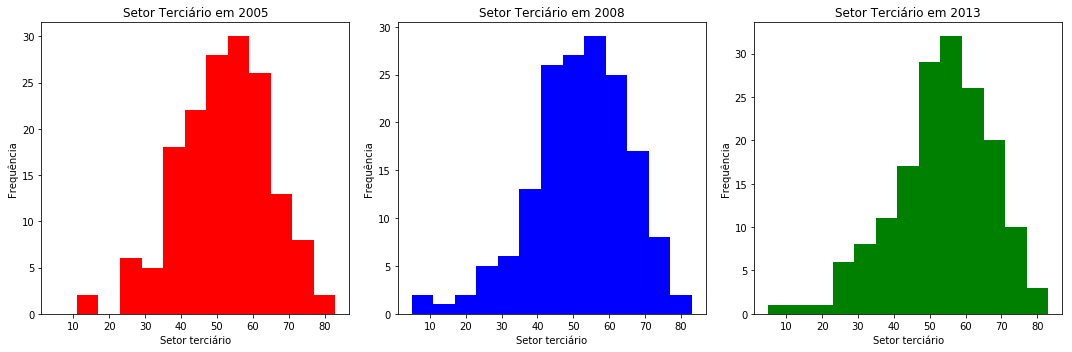

In [80]:
plt.figure(figsize=(15,5))

plt.subplot(131)
plot=data['2005_SPGDP'].plot.hist(bins=faixaSP, title='Setor Terciário em 2005', color = 'r')

plt.xlabel('Setor terciário')
plt.ylabel('Frequência')

plt.subplot(132)
plot=data['2008_SPGDP'].plot.hist(bins=faixaSP, title='Setor Terciário em 2008', color='b')

plt.xlabel('Setor terciário')
plt.ylabel('Frequência')

plt.subplot(133)
plot=data['2013_SPGDP'].plot.hist(bins=faixaSP, title='Setor Terciário em 2013', color='g')

plt.xlabel('Setor terciário') 
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

In [64]:
n = data.shape[0]
k = np.sqrt(len(data['2013_HDI']))
amplitudeIDH = (data['2013_HDI'].max() - data['2005_HDI'].min())/k
print(amplitudeIDH)

0.050692307692307696


In [75]:
faixaHDI = np.arange(0.2,1,0.075)

faixa_HDI_2005 = pd.cut(data['2005_HDI'], bins=faixaHDI, right=False)
count_HDI_2005 = faixa_HDI_2005.value_counts()

faixa_HDI_2008 = pd.cut(data['2008_HDI'], bins=faixaHDI, right=False)
count_HDI_2008 = faixa_HDI_2008.value_counts()

faixa_HDI_2013 = pd.cut(data['2013_HDI'], bins=faixaHDI, right=False)
count_HDI_2013 = faixa_HDI_2013.value_counts()

tabela_faixa_HDI = pd.DataFrame([faixa_HDI_2005,faixa_HDI_2008,faixa_HDI_2013]).T
tabela_faixa_HDI

,2005_HDI,2008_HDI,2013_HDI
country,,,
Afghanistan,"[0.35, 0.425)","[0.425, 0.5)","[0.425, 0.5)"
Albania,"[0.65, 0.725)","[0.65, 0.725)","[0.725, 0.8)"
Algeria,"[0.65, 0.725)","[0.65, 0.725)","[0.725, 0.8)"
Andorra,NaN,NaN,"[0.8, 0.875)"
Angola,"[0.425, 0.5)","[0.425, 0.5)","[0.5, 0.575)"
Antigua and Barbuda,"[0.725, 0.8)","[0.725, 0.8)","[0.725, 0.8)"
Argentina,"[0.725, 0.8)","[0.725, 0.8)","[0.8, 0.875)"
Armenia,"[0.65, 0.725)","[0.65, 0.725)","[0.725, 0.8)"
Australia,"[0.875, 0.95)","[0.875, 0.95)","[0.875, 0.95)"


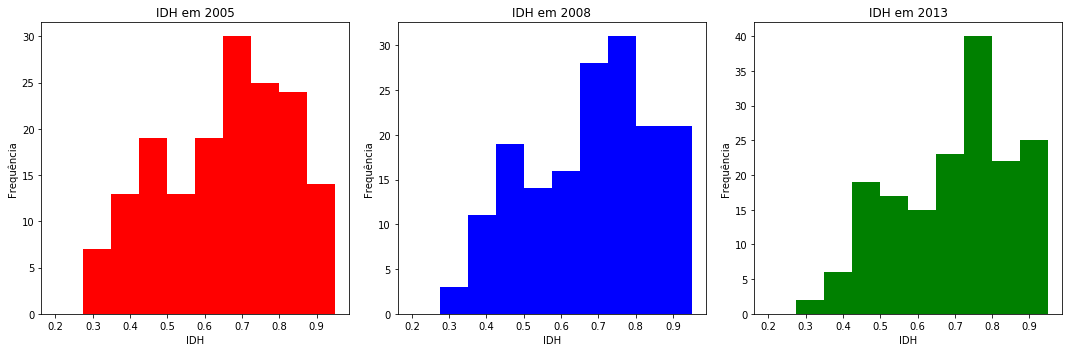

In [76]:
plt.figure(figsize=(15,5))

plt.subplot(131)
plot=data['2005_HDI'].plot.hist(bins=faixaHDI, title='IDH em 2005', color = 'r')

plt.xlabel('IDH')
plt.ylabel('Frequência')

plt.subplot(132)
plot=data['2008_HDI'].plot.hist(bins=faixaHDI, title='IDH em 2008', color='b')

plt.xlabel('IDH')
plt.ylabel('Frequência')

plt.subplot(133)
plot=data['2013_HDI'].plot.hist(bins=faixaHDI, title='IDH em 2013', color='g')

plt.xlabel('IDH') 
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

### Identificando faixas de SPGDP para países pertencentes ao SADC

In [84]:
SADC['2005_SPGDP'].value_counts(bins = faixaSP)

(47.0, 53.0]     5
(41.0, 47.0]     5
(59.0, 65.0]     2
(53.0, 59.0]     2
(35.0, 41.0]     1
(23.0, 29.0]     1
(77.0, 83.0]     0
(71.0, 77.0]     0
(65.0, 71.0]     0
(29.0, 35.0]     0
(17.0, 23.0]     0
(11.0, 17.0]     0
(4.999, 11.0]    0
Name: 2005_SPGDP, dtype: int64

In [85]:
SADC['2008_SPGDP'].value_counts(bins = faixaSP)

(47.0, 53.0]     7
(41.0, 47.0]     4
(59.0, 65.0]     2
(65.0, 71.0]     1
(35.0, 41.0]     1
(23.0, 29.0]     1
(77.0, 83.0]     0
(71.0, 77.0]     0
(53.0, 59.0]     0
(29.0, 35.0]     0
(17.0, 23.0]     0
(11.0, 17.0]     0
(4.999, 11.0]    0
Name: 2008_SPGDP, dtype: int64

In [86]:
SADC['2013_SPGDP'].value_counts(bins = faixaSP)

(47.0, 53.0]     6
(53.0, 59.0]     4
(59.0, 65.0]     2
(65.0, 71.0]     1
(35.0, 41.0]     1
(29.0, 35.0]     1
(17.0, 23.0]     1
(77.0, 83.0]     0
(71.0, 77.0]     0
(41.0, 47.0]     0
(23.0, 29.0]     0
(11.0, 17.0]     0
(4.999, 11.0]    0
Name: 2013_SPGDP, dtype: int64

### Identificando faixas de SPGDP para países da África

In [87]:
Africa['2005_SPGDP'].value_counts(bins = faixaSP)

(35.0, 41.0]     9
(53.0, 59.0]     3
(47.0, 53.0]     3
(41.0, 47.0]     3
(29.0, 35.0]     3
(23.0, 29.0]     3
(71.0, 77.0]     2
(77.0, 83.0]     1
(59.0, 65.0]     1
(65.0, 71.0]     0
(17.0, 23.0]     0
(11.0, 17.0]     0
(4.999, 11.0]    0
Name: 2005_SPGDP, dtype: int64

In [88]:
Africa['2008_SPGDP'].value_counts(bins = faixaSP)

(41.0, 47.0]     6
(35.0, 41.0]     6
(47.0, 53.0]     5
(29.0, 35.0]     3
(53.0, 59.0]     2
(23.0, 29.0]     2
(77.0, 83.0]     1
(65.0, 71.0]     1
(59.0, 65.0]     1
(17.0, 23.0]     1
(11.0, 17.0]     1
(71.0, 77.0]     0
(4.999, 11.0]    0
Name: 2008_SPGDP, dtype: int64

In [89]:
Africa['2013_SPGDP'].value_counts(bins = faixaSP)

(47.0, 53.0]     7
(41.0, 47.0]     5
(35.0, 41.0]     5
(29.0, 35.0]     5
(23.0, 29.0]     3
(59.0, 65.0]     2
(65.0, 71.0]     1
(53.0, 59.0]     1
(77.0, 83.0]     0
(71.0, 77.0]     0
(17.0, 23.0]     0
(11.0, 17.0]     0
(4.999, 11.0]    0
Name: 2013_SPGDP, dtype: int64

### Identificando faixas de SPGDP para o resto do mundo

In [90]:
Mundo['2005_SPGDP'].value_counts(bins = faixaSP)

(53.0, 59.0]     25
(59.0, 65.0]     23
(47.0, 53.0]     19
(41.0, 47.0]     15
(65.0, 71.0]     13
(35.0, 41.0]      8
(71.0, 77.0]      6
(29.0, 35.0]      2
(23.0, 29.0]      2
(11.0, 17.0]      2
(77.0, 83.0]      1
(17.0, 23.0]      0
(4.999, 11.0]     0
Name: 2005_SPGDP, dtype: int64

In [91]:
Mundo['2008_SPGDP'].value_counts(bins = faixaSP)

(53.0, 59.0]     26
(59.0, 65.0]     22
(47.0, 53.0]     16
(41.0, 47.0]     16
(65.0, 71.0]     15
(71.0, 77.0]      8
(35.0, 41.0]      6
(23.0, 29.0]      3
(29.0, 35.0]      2
(4.999, 11.0]     2
(77.0, 83.0]      1
(17.0, 23.0]      1
(11.0, 17.0]      0
Name: 2008_SPGDP, dtype: int64

In [92]:
Mundo['2013_SPGDP'].value_counts(bins = faixaSP)

(53.0, 59.0]     25
(59.0, 65.0]     22
(65.0, 71.0]     19
(47.0, 53.0]     17
(41.0, 47.0]     12
(71.0, 77.0]      9
(35.0, 41.0]      6
(77.0, 83.0]      3
(23.0, 29.0]      3
(29.0, 35.0]      2
(11.0, 17.0]      1
(4.999, 11.0]     1
(17.0, 23.0]      0
Name: 2013_SPGDP, dtype: int64

### Identificando faixas de IDH para países pertencentes ao SADC

In [93]:
SADC['2005_HDI'].value_counts(bins = faixaHDI)

(0.425, 0.5]      6
(0.35, 0.425]     4
(0.575, 0.65]     2
(0.5, 0.575]      2
(0.725, 0.8]      1
(0.65, 0.725]     1
(0.875, 0.95]     0
(0.8, 0.875]      0
(0.275, 0.35]     0
(0.199, 0.275]    0
Name: 2005_HDI, dtype: int64

In [94]:
SADC['2008_HDI'].value_counts(bins = faixaHDI)

(0.425, 0.5]      5
(0.35, 0.425]     4
(0.725, 0.8]      2
(0.575, 0.65]     2
(0.5, 0.575]      2
(0.65, 0.725]     1
(0.875, 0.95]     0
(0.8, 0.875]      0
(0.275, 0.35]     0
(0.199, 0.275]    0
Name: 2008_HDI, dtype: int64

In [95]:
SADC['2013_HDI'].value_counts(bins = faixaHDI)

(0.5, 0.575]      5
(0.425, 0.5]      4
(0.725, 0.8]      2
(0.65, 0.725]     2
(0.35, 0.425]     2
(0.575, 0.65]     1
(0.875, 0.95]     0
(0.8, 0.875]      0
(0.275, 0.35]     0
(0.199, 0.275]    0
Name: 2013_HDI, dtype: int64

### Identificando faixas de IDH para países africanos

In [96]:
Africa['2005_HDI'].value_counts(bins = faixaHDI)

(0.425, 0.5]      8
(0.35, 0.425]     7
(0.275, 0.35]     7
(0.5, 0.575]      5
(0.575, 0.65]     2
(0.65, 0.725]     1
(0.875, 0.95]     0
(0.8, 0.875]      0
(0.725, 0.8]      0
(0.199, 0.275]    0
Name: 2005_HDI, dtype: int64

In [97]:
Africa['2008_HDI'].value_counts(bins = faixaHDI)

(0.425, 0.5]      11
(0.35, 0.425]      7
(0.5, 0.575]       4
(0.575, 0.65]      3
(0.275, 0.35]      3
(0.65, 0.725]      2
(0.875, 0.95]      0
(0.8, 0.875]       0
(0.725, 0.8]       0
(0.199, 0.275]     0
Name: 2008_HDI, dtype: int64

In [98]:
Africa['2013_HDI'].value_counts(bins = faixaHDI)

(0.425, 0.5]      12
(0.575, 0.65]      5
(0.5, 0.575]       5
(0.35, 0.425]      4
(0.275, 0.35]      2
(0.725, 0.8]       1
(0.65, 0.725]      1
(0.875, 0.95]      0
(0.8, 0.875]       0
(0.199, 0.275]     0
Name: 2013_HDI, dtype: int64

### Identificando faixas de IDH para o resto do mundo

In [99]:
Mundo['2005_HDI'].value_counts(bins = faixaHDI)

(0.65, 0.725]     28
(0.8, 0.875]      24
(0.725, 0.8]      24
(0.575, 0.65]     15
(0.875, 0.95]     14
(0.5, 0.575]       6
(0.425, 0.5]       5
(0.35, 0.425]      2
(0.275, 0.35]      0
(0.199, 0.275]     0
Name: 2005_HDI, dtype: int64

In [100]:
Mundo['2008_HDI'].value_counts(bins = faixaHDI)

(0.725, 0.8]      29
(0.65, 0.725]     25
(0.875, 0.95]     21
(0.8, 0.875]      21
(0.575, 0.65]     11
(0.5, 0.575]       7
(0.425, 0.5]       4
(0.35, 0.425]      0
(0.275, 0.35]      0
(0.199, 0.275]     0
Name: 2008_HDI, dtype: int64

In [101]:
Mundo['2013_HDI'].value_counts(bins = faixaHDI)

(0.725, 0.8]      37
(0.875, 0.95]     25
(0.8, 0.875]      22
(0.65, 0.725]     20
(0.575, 0.65]      9
(0.5, 0.575]       6
(0.425, 0.5]       4
(0.35, 0.425]      0
(0.275, 0.35]      0
(0.199, 0.275]     0
Name: 2013_HDI, dtype: int64

### Agora vamos plotar os histogramas de comparação entre SPGDP das três categorias diferentes

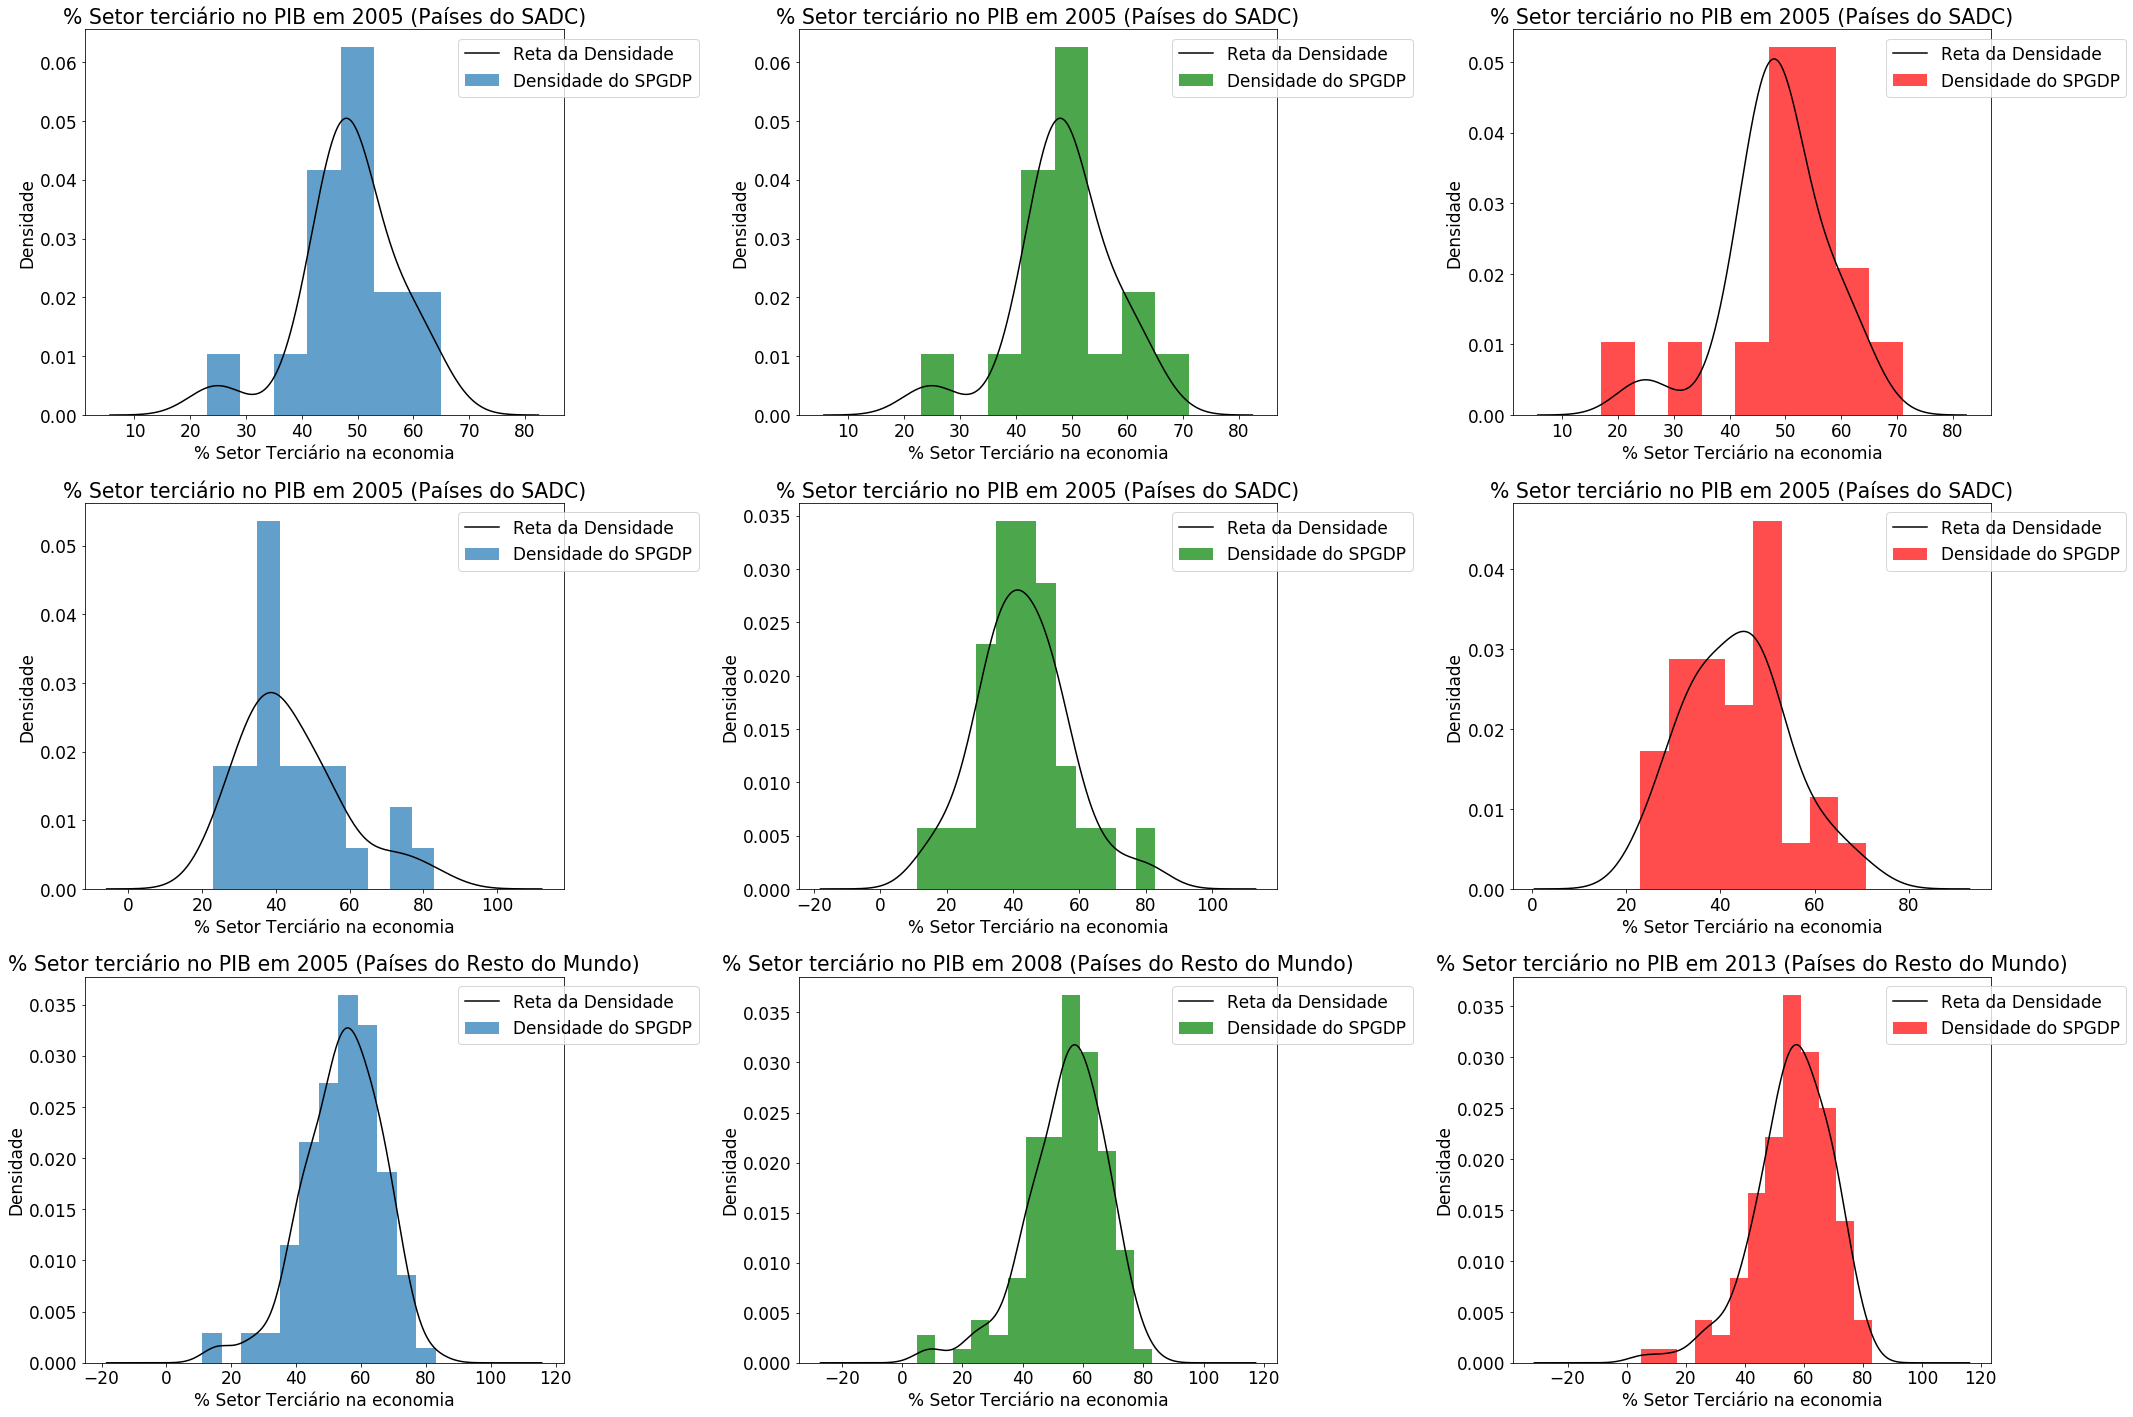

In [104]:
plt.figure(figsize=(30,20))

plt.rc('legend', fontsize=17)
plt.rc('font', size=17)

# SADC

plt.subplot(331)
plot=SADC['2005_SPGDP'].plot.hist(bins=faixaSP, title='% Setor terciário no PIB em 2005 (Países do SADC)', density=True, alpha=0.7)
SADC['2005_SPGDP'].plot.kde(color='black')
plt.xlabel('% Setor Terciário na economia')
plt.ylabel('Densidade')
plt.legend(('Reta da Densidade','Densidade do SPGDP'),loc='center right', bbox_to_anchor=(1.3,0.9))

plt.subplot(332)
plot=SADC['2008_SPGDP'].plot.hist(bins=faixaSP, title='% Setor terciário no PIB em 2005 (Países do SADC)', density=True, alpha=0.7, color = 'g')
SADC['2005_SPGDP'].plot.kde(color='black')
plt.xlabel('% Setor Terciário na economia')
plt.ylabel('Densidade')
plt.legend(('Reta da Densidade','Densidade do SPGDP'),loc='center right', bbox_to_anchor=(1.3,0.9))

plt.subplot(333)
plot=SADC['2013_SPGDP'].plot.hist(bins=faixaSP, title='% Setor terciário no PIB em 2005 (Países do SADC)', density=True, alpha=0.7, color = 'r')
SADC['2005_SPGDP'].plot.kde(color='black')
plt.xlabel('% Setor Terciário na economia')
plt.ylabel('Densidade')
plt.legend(('Reta da Densidade','Densidade do SPGDP'),loc='center right', bbox_to_anchor=(1.3,0.9))

#África

plt.subplot(334)
plot=Africa['2005_SPGDP'].plot.hist(bins=faixaSP, title='% Setor terciário no PIB em 2005 (Países do SADC)', density=True, alpha=0.7)
Africa['2005_SPGDP'].plot.kde(color='black')
plt.xlabel('% Setor Terciário na economia')
plt.ylabel('Densidade')
plt.legend(('Reta da Densidade','Densidade do SPGDP'),loc='center right', bbox_to_anchor=(1.3,0.9))

plt.subplot(335)
plot=Africa['2008_SPGDP'].plot.hist(bins=faixaSP, title='% Setor terciário no PIB em 2005 (Países do SADC)', density=True, alpha=0.7, color = 'g')
Africa['2008_SPGDP'].plot.kde(color='black')
plt.xlabel('% Setor Terciário na economia')
plt.ylabel('Densidade')
plt.legend(('Reta da Densidade','Densidade do SPGDP'),loc='center right', bbox_to_anchor=(1.3,0.9))

plt.subplot(336)
plot=Africa['2013_SPGDP'].plot.hist(bins=faixaSP, title='% Setor terciário no PIB em 2005 (Países do SADC)', density=True, alpha=0.7, color = 'r')
Africa['2013_SPGDP'].plot.kde(color='black')
plt.xlabel('% Setor Terciário na economia')
plt.ylabel('Densidade')
plt.legend(('Reta da Densidade','Densidade do SPGDP'),loc='center right', bbox_to_anchor=(1.3,0.9))

#Resto do Mundo

plt.subplot(337)
plot=Mundo['2005_SPGDP'].plot.hist(bins=faixaSP, title='% Setor terciário no PIB em 2005 (Países do Resto do Mundo)', density=True, alpha=0.7)
Mundo['2005_SPGDP'].plot.kde(color='black')
plt.xlabel('% Setor Terciário na economia')
plt.ylabel('Densidade')
plt.legend(('Reta da Densidade','Densidade do SPGDP'),loc='center right', bbox_to_anchor=(1.3,0.9))

plt.subplot(338)
plot=Mundo['2008_SPGDP'].plot.hist(bins=faixaSP, title='% Setor terciário no PIB em 2008 (Países do Resto do Mundo)', density=True, alpha=0.7, color = 'g')
Mundo['2008_SPGDP'].plot.kde(color='black')
plt.xlabel('% Setor Terciário na economia')
plt.ylabel('Densidade')
plt.legend(('Reta da Densidade','Densidade do SPGDP'),loc='center right', bbox_to_anchor=(1.3,0.9))

plt.subplot(339)
plot=Mundo['2013_SPGDP'].plot.hist(bins=faixaSP, title='% Setor terciário no PIB em 2013 (Países do Resto do Mundo)', density=True, alpha=0.7, color = 'r')
Mundo['2013_SPGDP'].plot.kde(color='black')
plt.xlabel('% Setor Terciário na economia')
plt.ylabel('Densidade')
plt.legend(('Reta da Densidade','Densidade do SPGDP'),loc='center right', bbox_to_anchor=(1.3,0.9))

plt.tight_layout()
plt.show()

### Agora vamos plotar os histogramas de comparação entre IDH das três categorias diferentes


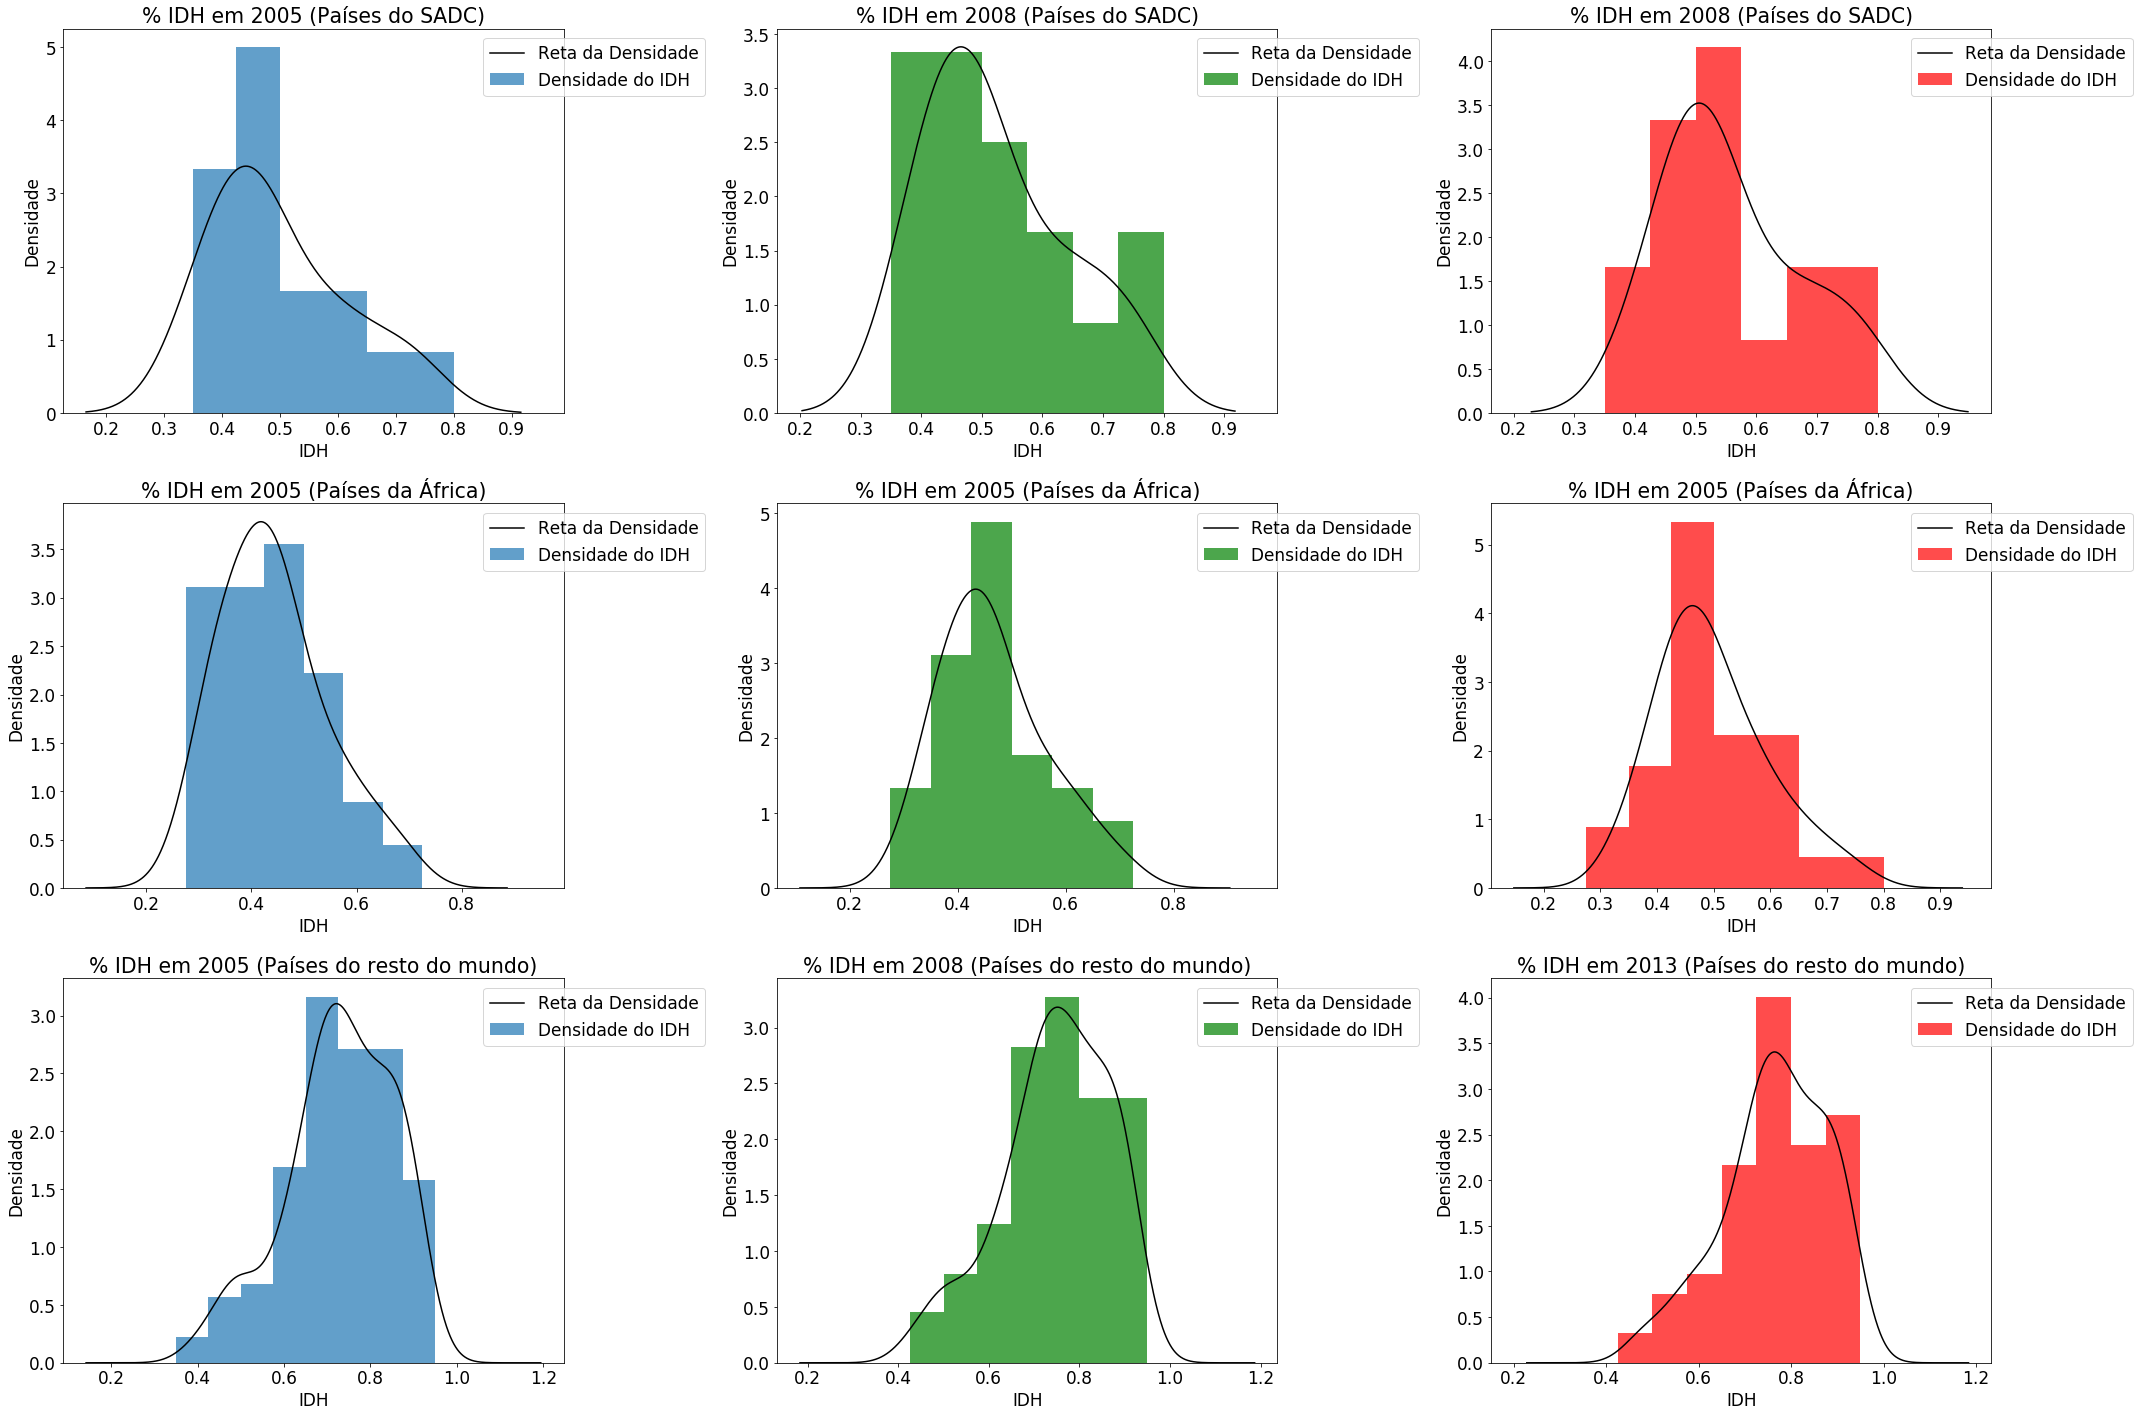

In [105]:
plt.figure(figsize=(30,20))

plt.rc('legend', fontsize=17)
plt.rc('font', size=17)

#SADC

plt.subplot(331)
plot=SADC['2005_HDI'].plot.hist(bins=faixaHDI, title='% IDH em 2005 (Países do SADC)', density=True, alpha=0.7)
SADC['2005_HDI'].plot.kde(color='black')
plt.xlabel('IDH')
plt.ylabel('Densidade')
plt.legend(('Reta da Densidade','Densidade do IDH'),loc='center right', bbox_to_anchor=(1.3,0.9))

plt.subplot(332)
plot=SADC['2008_HDI'].plot.hist(bins=faixaHDI, title='% IDH em 2008 (Países do SADC)', density=True, alpha=0.7, color = 'g')
SADC['2008_HDI'].plot.kde(color='black')
plt.xlabel('IDH')
plt.ylabel('Densidade')
plt.legend(('Reta da Densidade','Densidade do IDH'),loc='center right', bbox_to_anchor=(1.3,0.9))

plt.subplot(333)
plot=SADC['2013_HDI'].plot.hist(bins=faixaHDI, title='% IDH em 2008 (Países do SADC)', density=True, alpha=0.7, color = 'r')
SADC['2013_HDI'].plot.kde(color='black')
plt.xlabel('IDH')
plt.ylabel('Densidade')
plt.legend(('Reta da Densidade','Densidade do IDH'),loc='center right', bbox_to_anchor=(1.3,0.9))

#África

plt.subplot(334)
plot=Africa['2005_HDI'].plot.hist(bins=faixaHDI, title='% IDH em 2005 (Países da África)', density=True, alpha=0.7)
Africa['2005_HDI'].plot.kde(color='black')
plt.xlabel('IDH')
plt.ylabel('Densidade')
plt.legend(('Reta da Densidade','Densidade do IDH'),loc='center right', bbox_to_anchor=(1.3,0.9))

plt.subplot(335)
plot=Africa['2008_HDI'].plot.hist(bins=faixaHDI, title='% IDH em 2005 (Países da África)', density=True, alpha=0.7, color = 'g')
Africa['2008_HDI'].plot.kde(color='black')
plt.xlabel('IDH')
plt.ylabel('Densidade')
plt.legend(('Reta da Densidade','Densidade do IDH'),loc='center right', bbox_to_anchor=(1.3,0.9))

plt.subplot(336)
plot=Africa['2013_HDI'].plot.hist(bins=faixaHDI, title='% IDH em 2005 (Países da África)', density=True, alpha=0.7, color = 'r')
Africa['2013_HDI'].plot.kde(color='black')
plt.xlabel('IDH')
plt.ylabel('Densidade')
plt.legend(('Reta da Densidade','Densidade do IDH'),loc='center right', bbox_to_anchor=(1.3,0.9))


#Mundo

plt.subplot(337)
plot=Mundo['2005_HDI'].plot.hist(bins=faixaHDI, title='% IDH em 2005 (Países do resto do mundo)', density=True, alpha=0.7)
Mundo['2005_HDI'].plot.kde(color='black')
plt.xlabel('IDH')
plt.ylabel('Densidade')
plt.legend(('Reta da Densidade','Densidade do IDH'),loc='center right', bbox_to_anchor=(1.3,0.9))

plt.subplot(338)
plot=Mundo['2008_HDI'].plot.hist(bins=faixaHDI, title='% IDH em 2008 (Países do resto do mundo)', density=True, alpha=0.7, color = 'g')
Mundo['2008_HDI'].plot.kde(color='black')
plt.xlabel('IDH')
plt.ylabel('Densidade')
plt.legend(('Reta da Densidade','Densidade do IDH'),loc='center right', bbox_to_anchor=(1.3,0.9))

plt.subplot(339)
plot=Mundo['2013_HDI'].plot.hist(bins=faixaHDI, title='% IDH em 2013 (Países do resto do mundo)', density=True, alpha=0.7, color = 'r')
Mundo['2013_HDI'].plot.kde(color='black')
plt.xlabel('IDH')
plt.ylabel('Densidade')
plt.legend(('Reta da Densidade','Densidade do IDH'),loc='center right', bbox_to_anchor=(1.3,0.9))

plt.tight_layout()
plt.show()